In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
with open('ne-press.json', 'rb') as f:
    data = json.load(f)

In [3]:
df = pd.DataFrame(data);df.head()

,d,l,pt,stub,t,updateDate
0,2/28/2019 11:00:00 AM,/newsevents/pressreleases/enforcement20190228a...,Enforcement Actions,NaN,Federal Reserve Board issues enforcement actio...,NaN
1,2/27/2019 3:00:00 PM,/newsevents/pressreleases/orders20190227a.htm,Orders on Banking Applications,NaN,The Federal Reserve Board announces approval o...,NaN
2,2/26/2019 2:00:00 PM,/newsevents/pressreleases/monetary20190226a.htm,Monetary Policy,NaN,Minutes of the Board's discount rate meetings ...,NaN
3,2/21/2019 5:00:00 PM,/newsevents/pressreleases/enforcement20190221a...,Enforcement Actions,NaN,Federal Reserve Board permanently bars former ...,NaN
4,2/20/2019 2:00:00 PM,/newsevents/pressreleases/monetary20190220a.htm,Monetary Policy,NaN,"Minutes of the Federal Open Market Committee, ...",NaN


In [4]:
with open('spx.json', 'rb') as f:
    spx_json = json.load(f)

In [5]:
spx = pd.DataFrame(spx_json['Time Series (Daily)']).T
spx.columns = ['open', 'high', 'low', 'close', 'adjusted_close', 'volume', 'divdend_amt', 'split_coef']

In [6]:
spx.head()

,open,high,low,close,adjusted_close,volume,divdend_amt,split_coef
2019-03-01,2798.2200,2808.0200,2787.3799,2803.6899,2803.6899,3972280000,0.0000,1.0000
2019-02-28,2788.1101,2793.7300,2782.5100,2784.4900,2784.4900,4396930000,0.0000,1.0000
2019-02-27,2787.5000,2795.7600,2775.1299,2792.3799,2792.3799,3767130000,0.0000,1.0000
2019-02-26,2792.3601,2803.1201,2789.4700,2793.8999,2793.8999,3645680000,0.0000,1.0000
2019-02-25,2804.3501,2813.4900,2794.9900,2796.1101,2796.1101,3804380000,0.0000,1.0000


In [7]:
spx.index = pd.to_datetime(spx.index)

In [8]:
spx.head()

,open,high,low,close,adjusted_close,volume,divdend_amt,split_coef
2019-03-01,2798.2200,2808.0200,2787.3799,2803.6899,2803.6899,3972280000,0.0000,1.0000
2019-02-28,2788.1101,2793.7300,2782.5100,2784.4900,2784.4900,4396930000,0.0000,1.0000
2019-02-27,2787.5000,2795.7600,2775.1299,2792.3799,2792.3799,3767130000,0.0000,1.0000
2019-02-26,2792.3601,2803.1201,2789.4700,2793.8999,2793.8999,3645680000,0.0000,1.0000
2019-02-25,2804.3501,2813.4900,2794.9900,2796.1101,2796.1101,3804380000,0.0000,1.0000


In [9]:
spx = spx.astype('float')

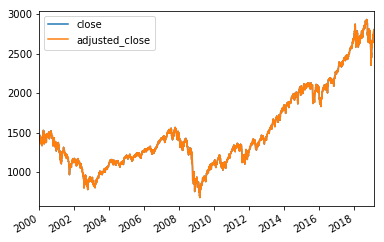

In [10]:
spx[['close', 'adjusted_close']].plot()

In [11]:
spx.describe()

,open,high,low,close,adjusted_close,volume,divdend_amt,split_coef
count,4820.000000,4820.000000,4820.000000,4820.000000,4820.000000,4.820000e+03,4820.0,4820.0
mean,1514.277113,1523.051230,1504.783942,1514.441334,1514.441334,3.073963e+09,0.0,1.0
std,519.850257,520.430076,519.152354,519.908771,519.908771,1.498185e+09,0.0,0.0
min,679.280000,695.270000,666.790000,676.530000,676.530000,3.560700e+08,0.0,1.0
25%,1143.745000,1150.440000,1135.755000,1143.872425,1143.872425,1.628030e+09,0.0,1.0
50%,1340.975050,1350.394950,1331.095000,1341.030050,1341.030050,3.196675e+09,0.0,1.0
75%,1877.755000,1886.540000,1870.320025,1878.240000,1878.240000,3.929052e+09,0.0,1.0
max,2936.760000,2940.909900,2927.110100,2930.750000,2930.750000,1.145623e+10,0.0,1.0


In [12]:
df['date'] = pd.to_datetime(df.d)

In [13]:
df.groupby('date').count().sort_values('d',ascending=False).head()

,d,l,pt,stub,t,updateDate
date,,,,,,
2010-08-16 11:00:00,5,5,5,0,5,0
2011-02-15 11:00:00,4,4,4,0,4,0
2006-04-24 00:00:00,4,4,4,0,4,0
2007-06-14 00:00:00,4,4,4,0,4,0
2010-06-07 11:00:00,4,4,4,0,4,0


We can see that at peak activity, there is only 5 announcement in a day. This is a problem as we might not be able to tell which activity causes the change in price.

# Solution - merge event title from that day

In [14]:
# now we will match the event with the posterior price movement to use it as the classification label.

In [15]:
# we will use the next day close as the day change in price

In [16]:
df = df[:-1] # remove non event at the end

In [17]:
df.groupby(df.date.dt.time).count().sort_values('d',ascending=False).head()

,d,l,pt,stub,t,updateDate,date
date,,,,,,,
11:00:00,922,922,922,0,922,0,922
00:00:00,469,469,469,0,469,0,469
14:00:00,462,462,462,2,462,0,462
10:00:00,297,297,297,1,297,0,297
12:00:00,212,212,212,0,212,0,212


(array([    0., 10000., 20000., 30000., 40000., 50000., 60000., 70000.,
        80000., 90000.]), <a list of 10 Text xticklabel objects>)

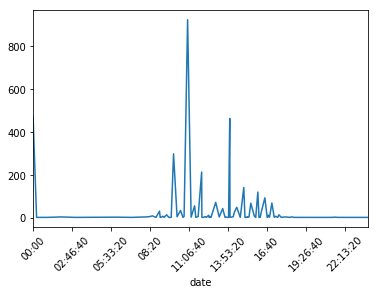

In [18]:
ax = df.groupby(df.date.dt.time).count()['d'].plot()
plt.xticks(rotation=45)

In [19]:
df['next_day'] = pd.DatetimeIndex(df['date']).ceil('D')

In [20]:
def merge_title(df):
    result = ''
    for t in df.t:
        result += t + ' | '
    return result
merged = df.groupby('next_day').aggregate(merge_title)[['t']]

In [21]:
merged.loc['2006-04-24'].t

'Written agreement with Sella Holding Banca | Order of prohibition against Robert Ray | Written agreement with The Bank of New York | Order of prohibition against David Cronin | '

In [22]:
merged.head()

,t
next_day,
2006-01-03,Approval of proposal by Kreditanstalt f&uuml;r...
2006-01-04,"Minutes of Federal Open Market Committee, Dece..."
2006-01-10,Consumer Advisory Council appointments for 200...
2006-01-11,"Minutes of Board discount rate meetings, Decem..."
2006-01-13,Federal Financial Regulators Announce Public S...


In [23]:
close = spx[['close']]
close['pct_change'] = close.pct_change() #close to close change
# fill date
close = close.reindex(pd.DatetimeIndex(start=close.index.min(), end=close.index.max(), freq='D'),
              method='bfill') 
# we use bfill here because we want to get the change of the next open day
# so for example if it is a saturday, we want to see the change of monday

# if we use ffill (forward fill) to avoid leaking, then we will get change from previous day which is not what we want
# since we are creating future indicator here it is ok to leak future information.

/home/harinsa/miniconda3/lib/python3.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/home/harinsa/miniconda3/lib/python3.7/site-packages/ipykernel/__main__.py:4: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.


In [24]:
dataset = merged.join(close).dropna()

In [25]:
dataset.head()

,t,close,pct_change
next_day,,,
2006-01-03,Approval of proposal by Kreditanstalt f&uuml;r...,1268.8000,-0.003659
2006-01-04,"Minutes of Federal Open Market Committee, Dece...",1273.4600,-0.000016
2006-01-10,Consumer Advisory Council appointments for 200...,1289.6899,-0.003470
2006-01-11,"Minutes of Board discount rate meetings, Decem...",1294.1801,0.006314
2006-01-13,Federal Financial Regulators Announce Public S...,1287.6100,0.003648


In [26]:
# now we are ready to do some feature engineering.

In [27]:
dataset.shape

(2024, 3)

In [28]:
ds = df.set_index('next_day').join(close)
ds.head()

,d,l,pt,stub,t,updateDate,date,close,pct_change
2006-01-03,1/3/2006,/newsevents/pressreleases/orders20060103a.htm,Orders on Banking Applications,NaN,Approval of proposal by Kreditanstalt f&uuml;r...,NaN,2006-01-03 00:00:00,1268.8000,-0.003659
2006-01-04,1/3/2006 2:00:00 PM,/newsevents/pressreleases/monetary20060103a.htm,Monetary Policy,NaN,"Minutes of Federal Open Market Committee, Dece...",NaN,2006-01-03 14:00:00,1273.4600,-0.000016
2006-01-10,1/9/2006 11:30:00 AM,/newsevents/pressreleases/other20060109a.htm,Other Announcements,NaN,Consumer Advisory Council appointments for 2006,NaN,2006-01-09 11:30:00,1289.6899,-0.003470
2006-01-10,1/10/2006,/newsevents/pressreleases/other20060110a.htm,Other Announcements,NaN,Reserve Bank income and expense data and trans...,NaN,2006-01-10 00:00:00,1289.6899,-0.003470
2006-01-11,1/10/2006 2:00:00 PM,/newsevents/pressreleases/monetary20060110a.htm,Monetary Policy,NaN,"Minutes of Board discount rate meetings, Decem...",NaN,2006-01-10 14:00:00,1294.1801,0.006314


In [29]:
ds = ds[ds.columns.difference(['stub','updateDate'])]

In [30]:
ds.shape

(3374, 7)

In [31]:
ds.dropna().shape

(3373, 7)

In [32]:
ds = ds.dropna()

In [34]:
# import os
# os.mkdir('./data')

In [ ]:
# ds.to_csv('./data/dataset.csv')

In [40]:
ds['y'] = (ds['pct_change']>0).astype(int)

In [46]:
ds.sort_values('pct_change')

,close,d,date,l,pct_change,pt,t,y
2008-10-10,899.2200,10/9/2008 7:00:00 PM,2008-10-09 19:00:00,/newsevents/pressreleases/bcreg20081009a.htm,-0.103782,Banking and Consumer Regulatory Policy,Statement on the efforts of Citigroup and Well...,0
2009-03-21,768.5400,3/20/2009 11:00:00 AM,2009-03-20 11:00:00,/newsevents/pressreleases/enforcement20090320a...,-0.066082,Enforcement Actions,Written agreement with Thunder Bancorp,0
2009-03-21,768.5400,3/20/2009 2:00:00 PM,2009-03-20 14:00:00,/newsevents/pressreleases/other20090320a.htm,-0.066082,Other Announcements,Publication date for annual revision to Indust...,0
2009-03-20,768.5400,3/19/2009 3:00:00 PM,2009-03-19 15:00:00,/newsevents/pressreleases/monetary20090319a.htm,-0.066082,Monetary Policy,Board announces that the set of eligible colla...,0
2008-11-21,800.0300,11/20/2008 2:00:00 PM,2008-11-20 14:00:00,/newsevents/pressreleases/monetary20081120a.htm,-0.060788,Monetary Policy,FOMC announces it will expand its December mee...,0
2008-11-20,752.4400,11/19/2008 2:00:00 PM,2008-11-19 14:00:00,/newsevents/pressreleases/monetary20081119a.htm,-0.059485,Monetary Policy,"Minutes of Federal Open Market Committee, Sept...",0
2008-11-20,752.4400,11/19/2008 11:00:00 AM,2008-11-19 11:00:00,/newsevents/pressreleases/enforcement20081119b...,-0.059485,Enforcement Actions,Written agreement with FirstBank Financial Ser...,0
2008-11-20,752.4400,11/19/2008 11:00:00 AM,2008-11-19 11:00:00,/newsevents/pressreleases/enforcement20081119a...,-0.059485,Enforcement Actions,Written agreement with Southern Community Banc...,0
2008-10-17,940.5500,10/16/2008 5:45:00 PM,2008-10-16 17:45:00,/newsevents/pressreleases/bcreg20081016b.htm,-0.045515,Banking and Consumer Regulatory Policy,Federal Reserve announces interim final rule t...,0
2008-10-18,940.5500,10/17/2008 3:00:00 PM,2008-10-17 15:00:00,/newsevents/pressreleases/bcreg20081017a.htm,-0.045515,Banking and Consumer Regulatory Policy,Agencies Announce Decision on Regulatory Capit...,0
